In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.duplicated().sum()

0

<AxesSubplot:>

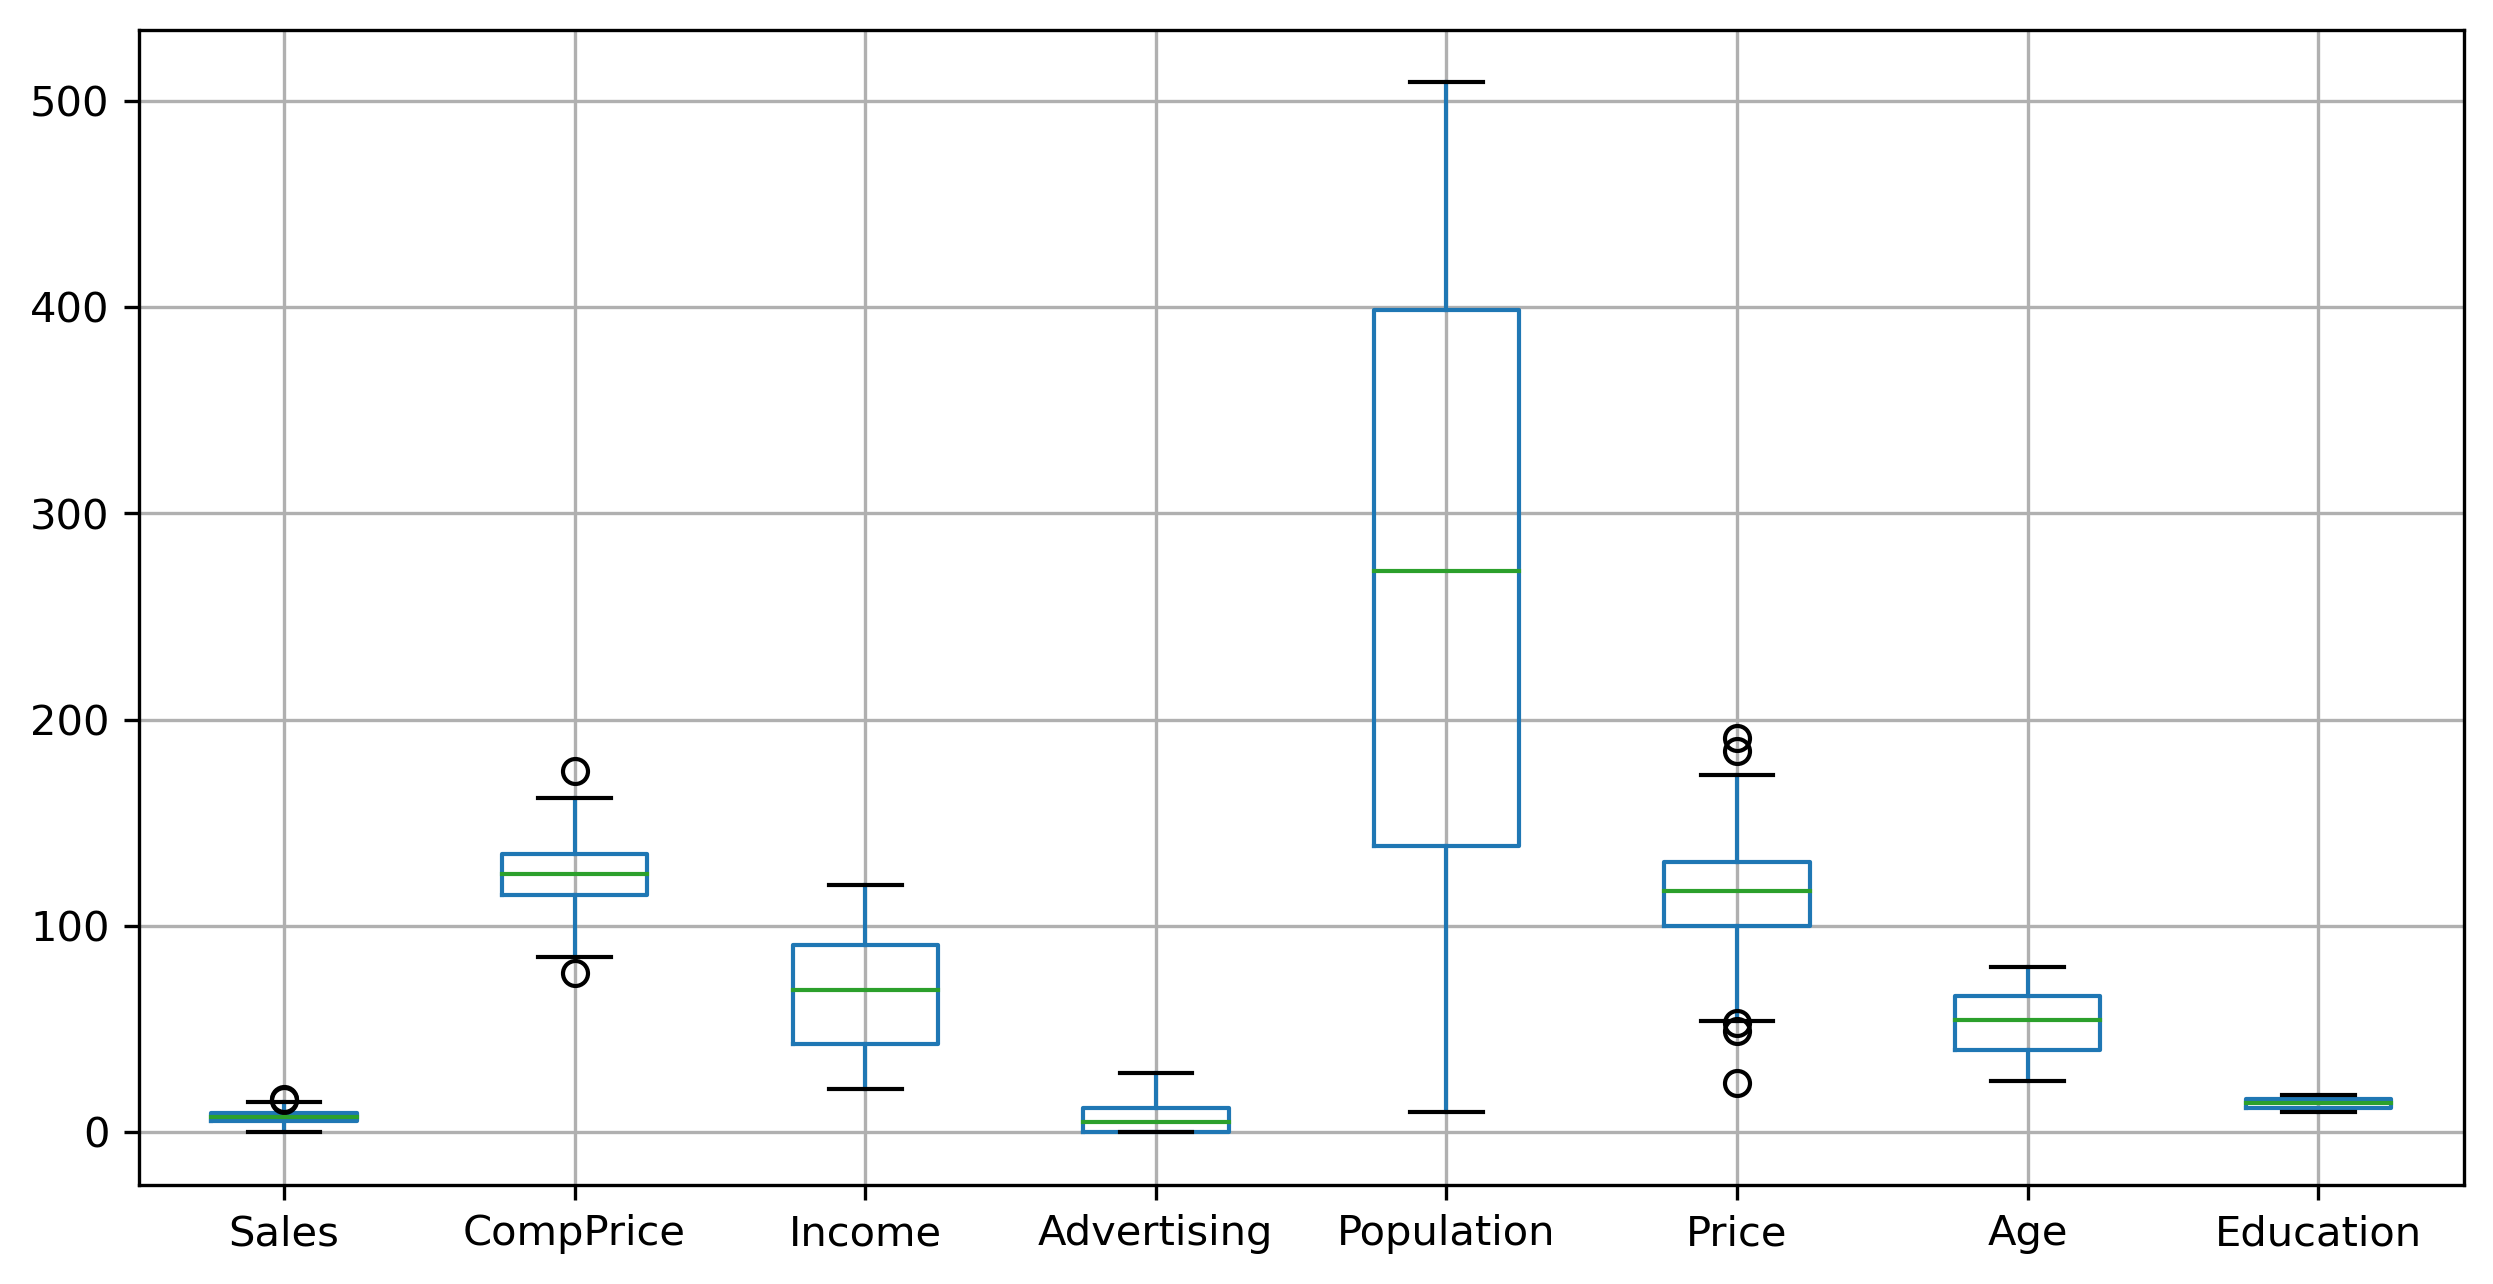

In [8]:
df.boxplot()

In [9]:
df['Sales']=df['Sales'].map(lambda x:1 if x>7.49
                          else 0)

In [10]:
df['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [11]:
oe=OrdinalEncoder()

In [12]:
cat_col=df.select_dtypes([object]).columns

In [13]:
cat_col

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [14]:
df[cat_col]=oe.fit_transform(df[cat_col])

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0.0,42,17,1.0,1.0
1,1,111,48,16,260,83,1.0,65,10,1.0,1.0
2,1,113,35,10,269,80,2.0,59,12,1.0,1.0
3,0,117,100,4,466,97,2.0,55,14,1.0,1.0
4,0,141,64,3,340,128,0.0,38,13,1.0,0.0


In [16]:
x=df.iloc[:,1:-1]
y=df['Sales']

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
ypred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [19]:
rf.score(xtrain,ytrain),rf.score(xtest,ytest)

(1.0, 0.75)

In [20]:
rf=RandomForestClassifier()
params= {
    'criterion': ['gini','entropy'],
    'max_depth':[10,15,18,19,20,21],
     'min_samples_split': [5,6,9,10,11],
    'n_estimators': [100,120,140,150]
}

In [21]:
grid = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=1)

In [22]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 18, 19, 20, 21],
                         'min_samples_split': [5, 6, 9, 10, 11],
                         'n_estimators': [100, 120, 140, 150]},
             verbose=1)

In [23]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 5,
 'n_estimators': 120}

In [24]:
rfc = RandomForestClassifier(min_samples_split=6,n_estimators=100,criterion='gini',max_depth=18)

rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
print(f"Training Accuracy : {rfc.score(xtrain,ytrain)}\n Testing Accuracy:{rfc.score(xtest,ytest)} ")

Training Accuracy : 1.0
 Testing Accuracy:0.8 
